In [2]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score

ModuleNotFoundError: No module named 'sklearn'

In [2]:
df=pd.read_csv("spam.csv", encoding='latin1',index_col=False)


In [1]:
print(df.columns)  # List of all column names
print(df.head())   # Display the first few rows

NameError: name 'df' is not defined

In [4]:
print(df.columns)  # List of all column names
print(df.head())   # Display the first few rows

Index(['v1', 'v2', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], dtype='object')
     v1                                                 v2 Unnamed: 2  \
0   ham  Go until jurong point, crazy.. Available only ...        NaN   
1   ham                      Ok lar... Joking wif u oni...        NaN   
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...        NaN   
3   ham  U dun say so early hor... U c already then say...        NaN   
4   ham  Nah I don't think he goes to usf, he lives aro...        NaN   

  Unnamed: 3 Unnamed: 4  
0        NaN        NaN  
1        NaN        NaN  
2        NaN        NaN  
3        NaN        NaN  
4        NaN        NaN  


In [5]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [6]:
df = df.drop(columns=[col for col in df.columns if 'Unnamed' in col])

In [7]:
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   v1      5572 non-null   object
 1   v2      5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [9]:
df.describe()

,v1,v2
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


In [10]:
null =df.isnull().sum()

In [11]:
print(null)


v1    0
v2    0
dtype: int64


In [12]:
df.shape

(5572, 2)

In [13]:
# label spam mail as 0;  ham mail as 1;

df.loc[df['v1'] == 'spam', 'v1',] = 0
df.loc[df['v1'] == 'ham', 'v1',] = 1

In [49]:
x = df['v2']
y= df['v1']

In [50]:
print(x)

0       Go until jurong point, crazy.. Available only ...
1                           Ok lar... Joking wif u oni...
2       Free entry in 2 a wkly comp to win FA Cup fina...
3       U dun say so early hor... U c already then say...
4       Nah I don't think he goes to usf, he lives aro...
                              ...                        
5567    This is the 2nd time we have tried 2 contact u...
5568                Will Ì_ b going to esplanade fr home?
5569    Pity, * was in mood for that. So...any other s...
5570    The guy did some bitching but I acted like i'd...
5571                           Rofl. Its true to its name
Name: v2, Length: 5572, dtype: object


In [51]:
print(y)

0       1
1       1
2       0
3       1
4       1
       ..
5567    0
5568    1
5569    1
5570    1
5571    1
Name: v1, Length: 5572, dtype: object


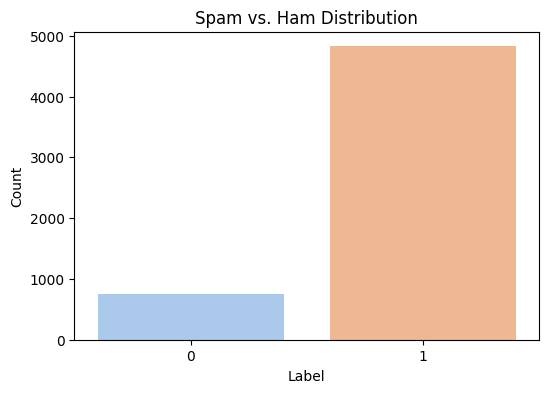

In [52]:
import matplotlib.pyplot as plt
import seaborn as sns
label_counts = df['v1'].value_counts()

# Bar plot with corrected usage of palette
plt.figure(figsize=(6, 4))
sns.barplot(x=label_counts.index, y=label_counts.values, hue=label_counts.index, dodge=False, palette='pastel', legend=False)
plt.title("Spam vs. Ham Distribution")
plt.xlabel("Label")
plt.ylabel("Count")
plt.show()

In [53]:
pip install wordcloud

COMMON WORDS FOUND IN BOTH SPAM AND HAM

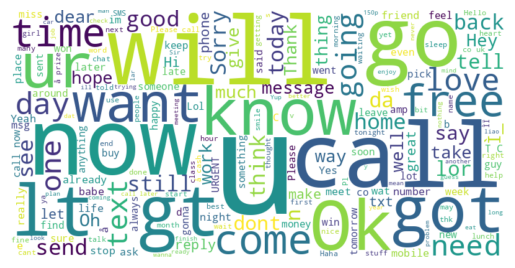

In [54]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Ensure 'v2' column is non-empty
df['v2'] = df['v2'].str.strip()  # Remove leading/trailing spaces
df = df[df['v2'].str.len() > 0]  # Remove rows where 'v2' is empty

# Combine all non-empty messages into a single string
text = ' '.join(df['v2'])

# Generate word cloud if text is not empty
if text:
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.show()
else:
    print("No valid words to create a word cloud.")


In [57]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=3)

In [55]:
print(x.shape)

(5572,)


In [56]:
print(x_train.shape)

(4457,)


In [58]:
print(x_test.shape)

(1115,)


In [59]:
print(x_test.shape)

(1115,)


In [60]:
print(y_train.shape)

(4457,)


In [61]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Transform the text data to feature vectors (input data for the model)
vectorizer = TfidfVectorizer(stop_words='english', lowercase=True)
x_train_features = vectorizer.fit_transform(x_train)
x_test_features = vectorizer.transform(x_test)



In [62]:
# transform the text data to feature vectors that can be used as input to the Logistic regression

feature_extraction = TfidfVectorizer(min_df = 1, stop_words='english', lowercase=True)

x_train_features = feature_extraction.fit_transform(x_train)
x_test_features = feature_extraction.transform(x_test)

# convert Y_train and Y_test values as integers

y_train = y_train.astype('int')
y_test = y_test.astype('int')

In [30]:
print(x_train)

3075    Mum, hope you are having a great day. Hoping t...
1787                           Yes:)sura in sun tv.:)lol.
1614    Me sef dey laugh you. Meanwhile how's my darli...
4304                Yo come over carlos will be here soon
3266                    Ok then i come n pick u at engin?
                              ...                        
789                          Gud mrng dear hav a nice day
968             Are you willing to go for aptitude class.
1667    So now my dad is gonna call after he gets out ...
3321    Ok darlin i supose it was ok i just worry too ...
1688                     Nan sonathaya soladha. Why boss?
Name: v2, Length: 4457, dtype: object


In [31]:
print(x_train_features)

  (0, 4513)	0.2909649098524696
  (0, 3380)	0.21807195185332803
  (0, 3262)	0.25877035357606315
  (0, 3136)	0.440116181574609
  (0, 2122)	0.38613577623520473
  (0, 3386)	0.3219352588930141
  (0, 6599)	0.20296878731699391
  (0, 4296)	0.3891385935794867
  (0, 3979)	0.2410582143632299
  (0, 741)	0.3219352588930141
  (1, 7443)	0.35056971070320353
  (1, 6442)	0.5652509076654626
  (1, 6417)	0.4769136859540388
  (1, 6872)	0.4306015894277422
  (1, 4061)	0.380431198316959
  (2, 5825)	0.4917598465723273
  (2, 2226)	0.413484525934624
  (2, 3917)	0.40088501350982736
  (2, 2109)	0.42972812260098503
  (2, 933)	0.4917598465723273
  (3, 7453)	0.5202633571003087
  (3, 1842)	0.3708680641487708
  (3, 1599)	0.5927091854194291
  (3, 6140)	0.4903863168693604
  (4, 1842)	0.36051481797205776
  :	:
  (4452, 4636)	0.4030918768627523
  (4453, 1762)	0.45610005640082985
  (4453, 7273)	0.5787739591782677
  (4453, 999)	0.6760129013031282
  (4454, 5370)	0.42618909997886
  (4454, 7346)	0.31166263834107377
  (4454, 1049

In [32]:
print(y_train.shape)

(4457,)


TRAINING THE MODEL

LOGISTIC REGRESSION

In [33]:
model = LogisticRegression()

In [85]:
# training the Logistic Regression model with the training data
model.fit(x_train_features, y_train)

LogisticRegression()

In [68]:
#prediction on test data
prediction_on_test_data = model.predict(x_test_features)
accuracy_on_test_data = accuracy_score(y_test, prediction_on_test_data)

In [70]:
print('accuracy_on_test_data:',  accuracy_on_test_data)

accuracy_on_test_data: 0.9623318385650225


In [73]:
#prediction on training data

prediction_on_train_data = model.predict(x_train_features)
accuracy_on_train_data = accuracy_score(y_train, prediction_on_train_data)

In [75]:
print('accuracy_on_trainig_data:',  accuracy_on_train_data)

accuracy_on_trainig_data: 0.9661207089970832


In [80]:
print(prediction_on_test_data)

[1 1 1 ... 1 1 1]


In [81]:
print(prediction_on_train_data)

[1 1 1 ... 1 1 1]


In [82]:
from sklearn.metrics import f1_score
f1_score_result=f1_score(y_test,prediction_on_test_data,average='weighted')

In [83]:
print(f1_score_result)

0.9599259733788881


In [84]:
from sklearn.metrics import classification_report, accuracy_score

# ... your other imports and code ...

# After making predictions:
report = classification_report(y_test, prediction_on_test_data, output_dict=True)

# Get precision, support, and F1-score for class 1 (ham)
precision = report['1']['precision']
support = report['1']['support']
f1_score = report['1']['f1-score']

print(f"Precision for class 1 (ham): {precision}")
print(f"Support for class 1 (ham): {support}")
print(f"F1-score for class 1 (ham): {f1_score}")

# If you need values for class 0 (spam) as well:
precision_0 = report['0']['precision']
support_0 = report['0']['support']
f1_score_0 = report['0']['f1-score']

print(f"Precision for class 0 (spam): {precision_0}")
print(f"Support for class 0 (spam): {support_0}")
print(f"F1-score for class 0 (spam): {f1_score_0}")

Precision for class 1 (ham): 0.959
Support for class 1 (ham): 960.0
F1-score for class 1 (ham): 0.9785714285714285
Precision for class 0 (spam): 0.991304347826087
Support for class 0 (spam): 155.0
F1-score for class 0 (spam): 0.8444444444444444


**RANDOM FOREST CLASSIFIER**

In [87]:
model = RandomForestClassifier()

In [88]:
# training the Logistic Regression model with the training data
model.fit(x_train_features, y_train)

RandomForestClassifier()

In [89]:
#prediction on test data
prediction_on_test_data = model.predict(x_test_features)
accuracy_on_test_data = accuracy_score(y_test, prediction_on_test_data)

In [90]:
print('accuracy_on_test_data:',  accuracy_on_test_data)

accuracy_on_test_data: 0.9829596412556054


In [92]:
#prediction on training data

prediction_on_train_data = model.predict(x_train_features)
accuracy_on_train_data = accuracy_score(y_train, prediction_on_train_data)

In [93]:
print('accuracy_on_trainig_data:',  accuracy_on_train_data)

accuracy_on_trainig_data: 1.0


In [94]:
print(prediction_on_test_data)

[1 0 1 ... 1 1 0]


In [95]:
print(prediction_on_train_data)

[1 1 1 ... 1 1 1]


In [96]:
from sklearn.metrics import f1_score
f1_score_result=f1_score(y_test,prediction_on_test_data,average='weighted')

In [97]:
print(f1_score_result)

0.982540073377524


In [98]:
from sklearn.metrics import classification_report, accuracy_score

# ... your other imports and code ...

# After making predictions:
report = classification_report(y_test, prediction_on_test_data, output_dict=True)

# Get precision, support, and F1-score for class 1 (ham)
precision = report['1']['precision']
support = report['1']['support']
f1_score = report['1']['f1-score']

print(f"Precision for class 1 (ham): {precision}")
print(f"Support for class 1 (ham): {support}")
print(f"F1-score for class 1 (ham): {f1_score}")

# If you need values for class 0 (spam) as well:
precision_0 = report['0']['precision']
support_0 = report['0']['support']
f1_score_0 = report['0']['f1-score']

print(f"Precision for class 0 (spam): {precision_0}")
print(f"Support for class 0 (spam): {support_0}")
print(f"F1-score for class 0 (spam): {f1_score_0}")

Precision for class 1 (ham): 0.9815762538382804
Support for class 1 (ham): 960.0
F1-score for class 1 (ham): 0.9901910170366546
Precision for class 0 (spam): 0.9927536231884058
Support for class 0 (spam): 155.0
F1-score for class 0 (spam): 0.9351535836177475


In [100]:
model = SVC()


In [101]:
# training the Logistic Regression model with the training data
model.fit(x_train_features, y_train)

SVC()

In [102]:
#prediction on test data
prediction_on_test_data = model.predict(x_test_features)
accuracy_on_test_data = accuracy_score(y_test, prediction_on_test_data)

In [103]:
print('accuracy_on_test_data:',  accuracy_on_test_data)

accuracy_on_test_data: 0.9829596412556054


In [104]:
print(prediction_on_test_data)

[1 0 1 ... 1 1 1]


In [105]:
from sklearn.metrics import f1_score
f1_score_result=f1_score(y_test,prediction_on_test_data,average='weighted')

In [106]:
print(f1_score_result)

0.9824868289750304


In [107]:
from sklearn.metrics import classification_report, accuracy_score

# ... your other imports and code ...

# After making predictions:
report = classification_report(y_test, prediction_on_test_data, output_dict=True)

# Get precision, support, and F1-score for class 1 (ham)
precision = report['1']['precision']
support = report['1']['support']
f1_score = report['1']['f1-score']

print(f"Precision for class 1 (ham): {precision}")
print(f"Support for class 1 (ham): {support}")
print(f"F1-score for class 1 (ham): {f1_score}")

# If you need values for class 0 (spam) as well:
precision_0 = report['0']['precision']
support_0 = report['0']['support']
f1_score_0 = report['0']['f1-score']

print(f"Precision for class 0 (spam): {precision_0}")
print(f"Support for class 0 (spam): {support_0}")
print(f"F1-score for class 0 (spam): {f1_score_0}")

Precision for class 1 (ham): 0.9805924412665986
Support for class 1 (ham): 960.0
F1-score for class 1 (ham): 0.9902011346054668
Precision for class 0 (spam): 1.0
Support for class 0 (spam): 155.0
F1-score for class 0 (spam): 0.9347079037800687


In [35]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score

Logistic Regression:
              precision    recall  f1-score   support

           0       1.00      0.08      0.15        25
           1       0.88      1.00      0.94       175

    accuracy                           0.89       200
   macro avg       0.94      0.54      0.54       200
weighted avg       0.90      0.89      0.84       200

Accuracy: 0.885

Random Forest:
              precision    recall  f1-score   support

           0       1.00      0.56      0.72        25
           1       0.94      1.00      0.97       175

    accuracy                           0.94       200
   macro avg       0.97      0.78      0.84       200
weighted avg       0.95      0.94      0.94       200

Accuracy: 0.945

Support Vector Machine:
              precision    recall  f1-score   support

           0       1.00      0.28      0.44        25
           1       0.91      1.00      0.95       175

    accuracy                           0.91       200
   macro avg       0.95      0.64 

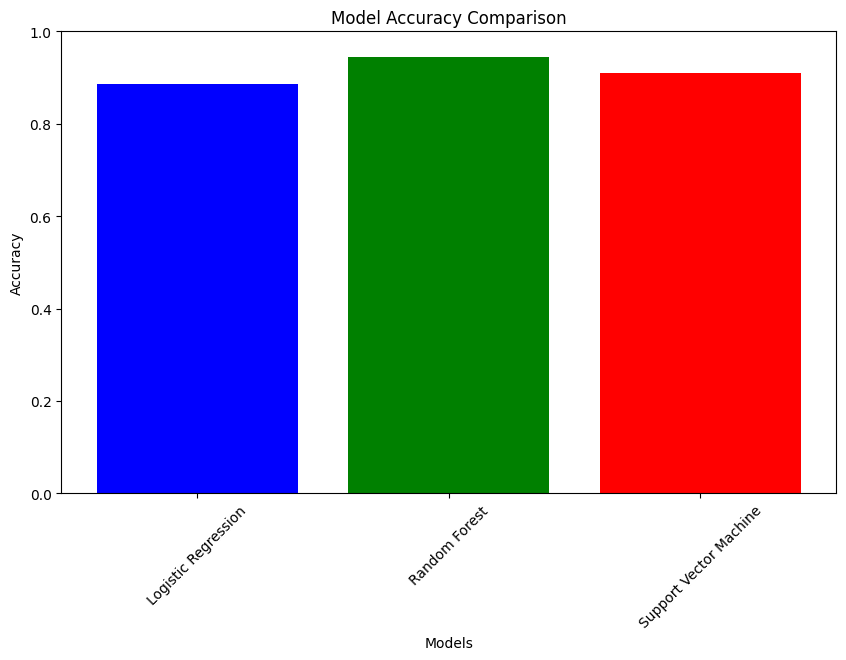

In [108]:
x_train_sample = x_train_features[:500].toarray()
y_train_sample = y_train[:500].values
x_test_sample = x_test_features[:200].toarray()
y_test_sample = y_test[:200].values

train_models(x_train_sample, x_test_sample, y_train_sample, y_test_sample)


In [64]:
def train_models(x_train_features, x_test_features, y_train, y_test):
    # Logistic Regression
    logistic_model = LogisticRegression()
    logistic_model.fit(x_train_features, y_train)
    y_pred_logistic = logistic_model.predict(x_test_features)
    print("Logistic Regression:")
    print(classification_report(y_test, y_pred_logistic))
    print("Accuracy:", accuracy_score(y_test, y_pred_logistic))

    # Random Forest
    rf_model = RandomForestClassifier()
    rf_model.fit(x_train_features, y_train)
    y_pred_rf = rf_model.predict(x_test_features)
    print("\nRandom Forest:")
    print(classification_report(y_test, y_pred_rf))
    print("Accuracy:", accuracy_score(y_test, y_pred_rf))

    # Support Vector Machine
    svm_model = SVC()
    svm_model.fit(x_train_features, y_train)
    y_pred_svm = svm_model.predict(x_test_features)
    print("\nSupport Vector Machine:")
    print(classification_report(y_test, y_pred_svm))
    print("Accuracy:", accuracy_score(y_test, y_pred_svm))

In [65]:
# Import necessary libraries
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score
import matplotlib.pyplot as plt
import numpy as np

# Ensure variables exist and are named as per the current notebook
def train_models(x_train_features, x_test_features, y_train, y_test):
    results = {}

    # Logistic Regression
    logistic_model = LogisticRegression()
    logistic_model.fit(x_train_features, y_train)
    y_pred_logistic = logistic_model.predict(x_test_features)
    logistic_accuracy = accuracy_score(y_test, y_pred_logistic)
    results['Logistic Regression'] = logistic_accuracy
    print("Logistic Regression:")
    print(classification_report(y_test, y_pred_logistic))
    print("Accuracy:", logistic_accuracy)

    # Random Forest
    rf_model = RandomForestClassifier()
    rf_model.fit(x_train_features, y_train)
    y_pred_rf = rf_model.predict(x_test_features)
    rf_accuracy = accuracy_score(y_test, y_pred_rf)
    results['Random Forest'] = rf_accuracy
    print("\nRandom Forest:")
    print(classification_report(y_test, y_pred_rf))
    print("Accuracy:", rf_accuracy)

    # Support Vector Machine
    svm_model = SVC()
    svm_model.fit(x_train_features, y_train)
    y_pred_svm = svm_model.predict(x_test_features)
    svm_accuracy = accuracy_score(y_test, y_pred_svm)
    results['Support Vector Machine'] = svm_accuracy
    print("\nSupport Vector Machine:")
    print(classification_report(y_test, y_pred_svm))
    print("Accuracy:", svm_accuracy)

    # Visualizing the results
    model_names = list(results.keys())
    accuracies = list(results.values())

    plt.figure(figsize=(10, 6))
    plt.bar(model_names, accuracies, color=['blue', 'green', 'red'])
    plt.title('Model Accuracy Comparison')
    plt.xlabel('Models')
    plt.ylabel('Accuracy')
    plt.ylim(0, 1)
    plt.xticks(rotation=45)
    plt.show()

# Assuming x_train_features, x_test_features, y_train, y_test are preprocessed and exist
# Uncomment and call the function with the appropriate data
# train_models(x_train_features, x_test_features, y_train, y_test)


In [66]:
print(x_train_features.shape, x_test_features.shape)
print(y_train.shape, y_test.shape)
print(type(x_train_features), type(y_train))


(4457, 7510) (1115, 7510)
(4457,) (1115,)
<class 'scipy.sparse._csr.csr_matrix'> <class 'pandas.core.series.Series'>
